<a href="https://colab.research.google.com/github/ashis003/Machine-Learning/blob/main/Linear_Regression_Model_(updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pandas.core.indexing import InvalidIndexError
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline



In [7]:
df=pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<Axes: xlabel='Newspaper', ylabel='Sales'>

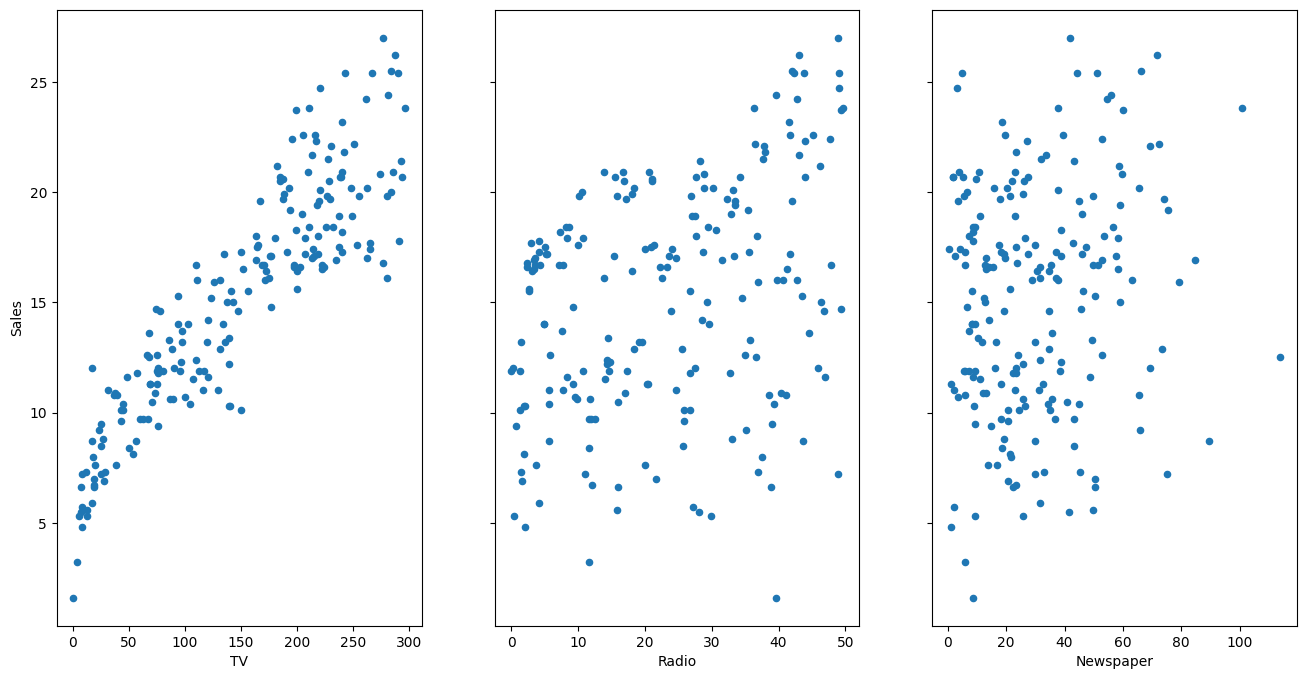

In [25]:
fig,axs=plt.subplots(1,3,sharey=True)
df.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1],figsize=(16,8))
df.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2],figsize=(16,8))



In [39]:
feature_cols = ['TV']
x = df[feature_cols]
y = df.Sales

In [59]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)


LinearRegression()

In [44]:
print(lm.intercept_)
print(lm.coef_)

6.974821488229891
[0.05546477]


In [45]:
6.974821488229891+50*0.05546477

9.74805998822989

In [46]:
X_new = pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [47]:
lm.predict(X_new)

array([9.74806001])

In [48]:
X_new = pd.DataFrame({'TV' : [df.TV.min(),df.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [34]:
preds = lm.predict(X_new)
preds

array([ 7.01364683, 23.41457946])

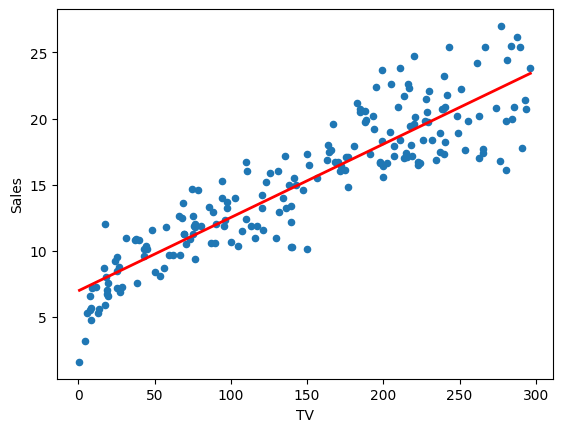

In [36]:
df.plot(kind='scatter',x='TV',y='Sales')
plt.plot(X_new,preds,c='red',linewidth=2)

In [61]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=df).fit()

In [56]:
lm.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [62]:
lm.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

In [57]:
lm.rsquared

0.8121757029987414